# Proceso estandar de regresión

(Millas / galon puese recorrer un auto)

1. Separar datos de entrenamiento / prueba
2. Normalizar datos / Creacion de normalizador
    - Normalizar los datos que pueden resultar en sesgos (eliminar o promediar)
3. Crear modelo (NN)
4. Entrenar
5. Evaluar resultados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [2]:
# Asegurar que los resultados sean 'reproducibles'
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(123)

# Datos de entrenamiento / prueba

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,4,90.0,75.0,2125.0,14.5,74,0,0,1
1,4,140.0,88.0,2890.0,17.3,79,0,0,1
2,8,350.0,160.0,4456.0,13.5,72,0,0,1
3,4,105.0,63.0,2125.0,14.7,82,0,0,1
4,4,97.0,67.0,2145.0,18.0,80,0,1,0


In [5]:
y_train.head()

,MPG
0,28.0
1,22.3
2,12.0
3,38.0
4,33.8


# Normalización

In [6]:
# funcion para normalizar datos
def crear_normalizacion(datos):
  normalizer = Normalization(axis=-1) ## axis=- para eliminar columnas en la normalizacion
  normalizer.adapt(np.array(datos))
  return normalizer

In [7]:
# llamado de funcion con el parametro de entrenamiento
normalizador = crear_normalizacion(X_train)

In [8]:
# Datos del normalizador
normalizador

# Creación de NN

# Arquitectura estandar para redes neuronales

primera capa / input layer
  * x neuronas

Segunda capa / hidden layer
  * tres capas internas
    1. first = x * 2
    2. second = first * 2
    3. third = first

Tercera capa / output layer
  * número de capas que se necesiten

#### Ejemplo:

Primera capa:
  * 4 neuronas

Segunda capa:
  * first
    * 8 neuronas
  * Second:
    * 16 neuronas
  * third:
    * 8 neuronas

Tercera capa:
  * 1 neurona

In [9]:
# funcion para creacion de red neuronal
# El normalizador define la cantidad de neuronas de la capa de entrada
def create_regression(norm):
  model = Sequential(
    [
        norm,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ]
  )

  # medidas de erro: (mean_squared_error - mean_absolute_error)
  ## 0.001 - ritmo de aprendizaje
  ### ¡TENER CUIDADO! SI ES MUY ALTO, PUEDE QUE SE PASE Y SI ES BAJO PUEDE QUE NUNCA LLEGUE
  model.compile(loss='mean_absolute_error', optimizer=Adam(0.001)) # estandar 0.01
  return model

In [10]:
# creacion de nn partiendo de la funcion y pasandole el normalizador
nn = create_regression(normalizador)

# Entrenamiento del modelo

In [11]:
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose = 1,
    epochs=100 # vgeces de entrenamiento
)

Epoch 1/100
8/8 [==============================] - 3s 74ms/step - loss: 22.7969 - val_loss: 22.8006
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 21.9000 - val_loss: 21.5937
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 20.4843 - val_loss: 19.4264
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 17.8695 - val_loss: 15.4381
Epoch 5/100
8/8 [==============================] - 0s 20ms/step - loss: 13.5494 - val_loss: 10.4528
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 8.4032 - val_loss: 7.5326
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 6.3703 - val_loss: 7.1946
Epoch 8/100
8/8 [==============================] - 0s 20ms/step - loss: 5.2396 - val_loss: 5.4915
Epoch 9/100
8/8 [==============================] - 0s 36ms/step - loss: 4.5896 - val_loss: 5.0448
Epoch 10/100
8/8 [==============================] - 0s 33ms/step - loss: 4.0793 - val_loss: 4.9899
Epoch 11/

# Evaluar rendimiento del modelo

In [12]:
# comparacion de X y y de prueba
## Promedio de todas las diferencias
### Entre mas cerca al 0 es mucho mejor
nn.evaluate(X_test, y_test, verbose=0)


# primer resultado NN1(9x32x64x32x1) = 1.67
# segundo resultado NN2(9x18x32x18x1) = 1.76
# tercer resultado NN3(9x32x18x32x1) = 1.76
# cuarto resultado NN4(9x32x64x64x32x1) = 1.86

1.8631134033203125

In [13]:
# creacion de predicciones
y_pred = nn.predict(X_test).flatten()

3/3 [==============================] - 0s 4ms/step


# Grafica de resultado

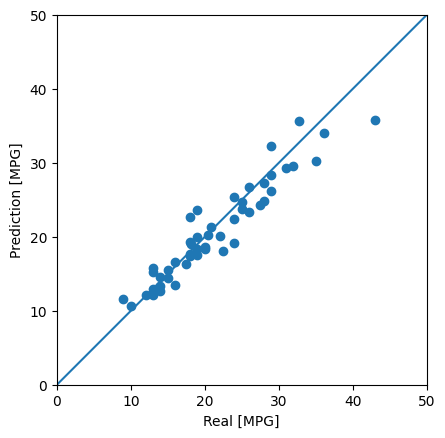

In [14]:
a = plt.axes(aspect='equal')
plt.scatter(y_test[0:50], y_pred[0:50])
plt.xlabel('Real [MPG]')
plt.ylabel('Prediction [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)